In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
 # Define column names
sensor_names = ['s_' + str(i) for i in range(1,22)]
column_names = ['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3'] + sensor_names

In [22]:
# import training data
df_train = pd.read_csv('CMAPSSData/train_FD001.txt', sep='\s+', header=None, index_col=False, names=column_names)
train = df_train.copy()

In [23]:
train

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [113]:
# import validation data
df_valid = pd.read_csv('CMAPSSData/test_FD001.txt', sep='\s+', header=None, names=column_names)
valid = df_valid.copy()
y_valid = pd.read_csv('CMAPSSData/RUL_FD001.txt', sep='\s+', header=None, index_col=False, names=['RUL'])

In [29]:
valid

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [33]:
print("shape of training data: ", train.shape)
print("shape of validation data: ", valid.shape)
print("percent of validation to train data", round(len(valid)/(len(valid) + len(train)),2))

shape of training data:  (20631, 26)
shape of validation data:  (13096, 26)
percent of validation to train data 0.39


In [36]:
# check for null values
train.isna().sum()

unit         0
cycle        0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64

In [37]:
train.describe()

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [49]:
# Plot max cycle count for all 100 units
max_cycle = train[['unit', 'cycle']].groupby('unit').max()

In [50]:
max_cycle

,cycle
unit,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


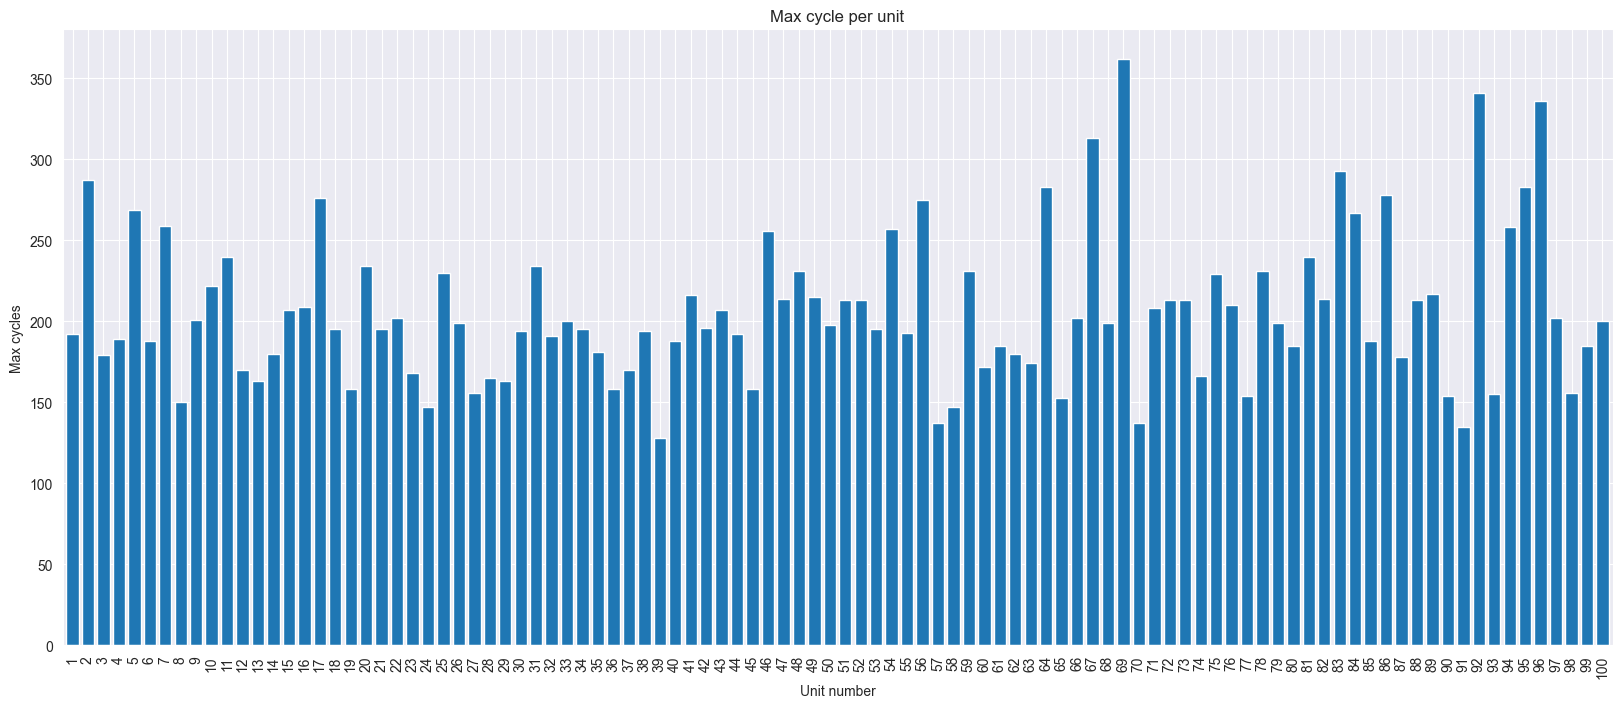

In [63]:
plt.figure(figsize=(20,8))
fig = max_cycle['cycle'].plot(kind='bar', width=0.8, stacked=True, align='center')
plt.title('Max cycle per unit')
plt.xlabel('Unit number')
plt.ylabel('Max cycles')
plt.grid(True)
plt.show()

Text(13.319444444444445, 0.5, 'Count of units in bin')

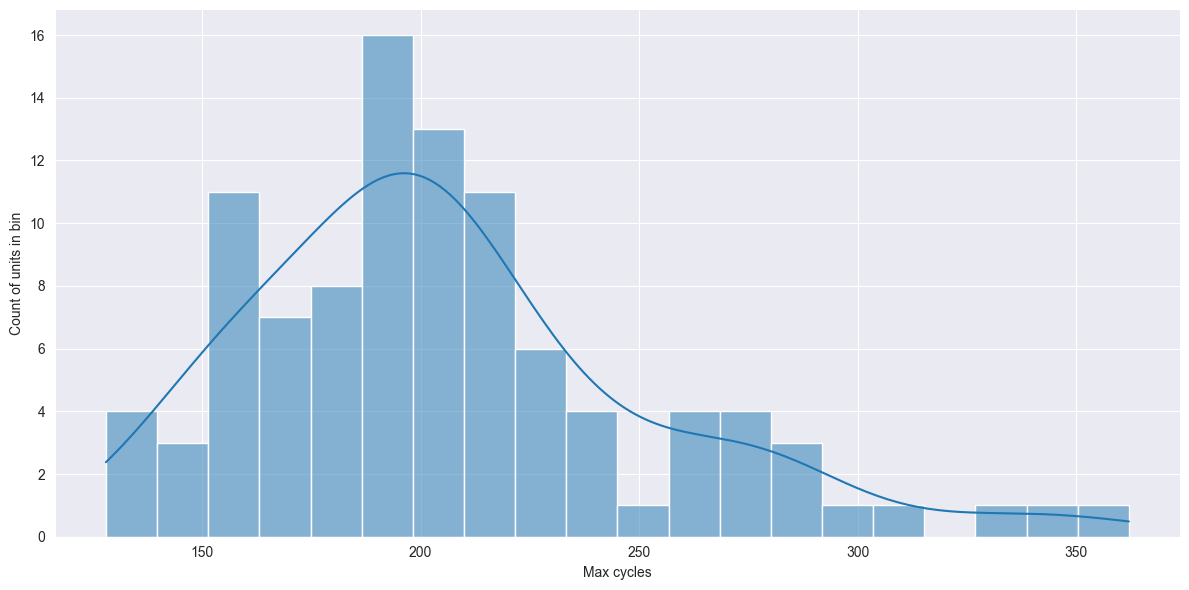

In [70]:
# Plot distribution of max cycles
sns.displot(max_cycle['cycle'], kde=True, bins=20, height=6, aspect=2)
plt.xlabel('Max cycles')
plt.ylabel('Count of units in bin')

In [93]:
train_grouped_by_unit = train.groupby(by='unit')
max_cycles = train_grouped_by_unit['cycle'].max()
merged = train.merge(max_cycles.to_frame(name='max_cycle'), left_on='unit', right_index=True)
merged['RUL'] = merged['max_cycle'] - merged['cycle']
train = merged.drop('max_cycle', axis=1)

In [94]:
train

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [95]:
train[['unit', 'RUL']]

,unit,RUL
0,1,191
1,1,190
2,1,189
3,1,188
4,1,187
...,...,...
20626,100,4
20627,100,3
20628,100,2
20629,100,1


In [96]:
max_rul = train.groupby('unit').max().reset_index()
max_rul.head()

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


<AxesSubplot: >

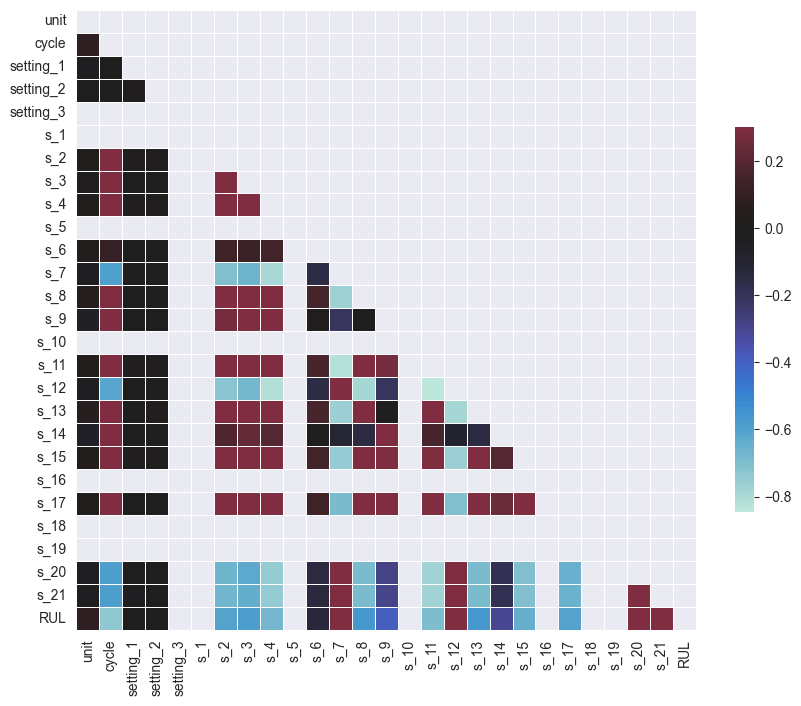

In [103]:
# Look for correlations
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [109]:
def plot_signal(df, sensor_dictionary, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit'].unique():
        if i % 10 == 0 : # only plot every 10th line for simplicity
            plt.plot('RUL', signal_name, data=df[df['unit'] == i].rolling(10).mean())
    plt.xlim(250,0)
    plt.xticks(np.arange(0, 300, 25))
    plt.xlabel('Remaning useful life')
    plt.ylabel(sensor_dictionary[signal_name])
    plt.show()

In [110]:
sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
for i in range(1,22):
    sensor_dictionary['s_' + str(i)] = dict_list[i-1]

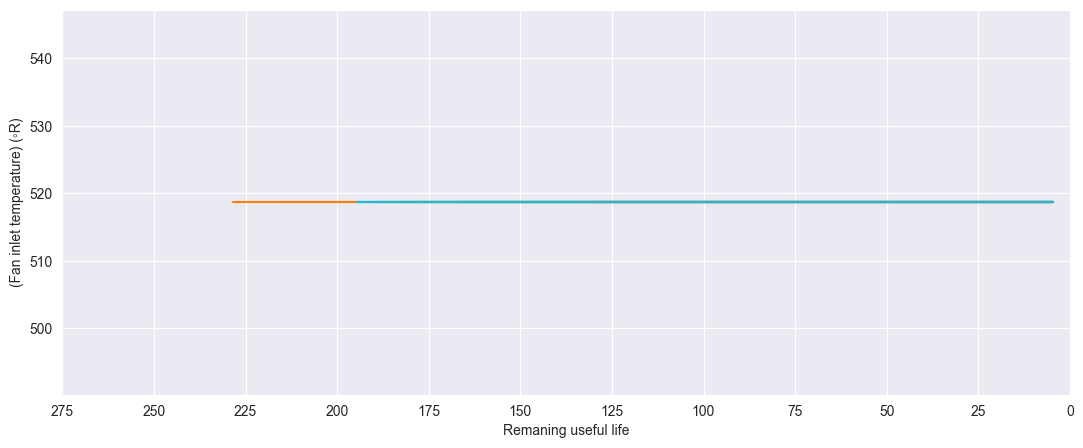

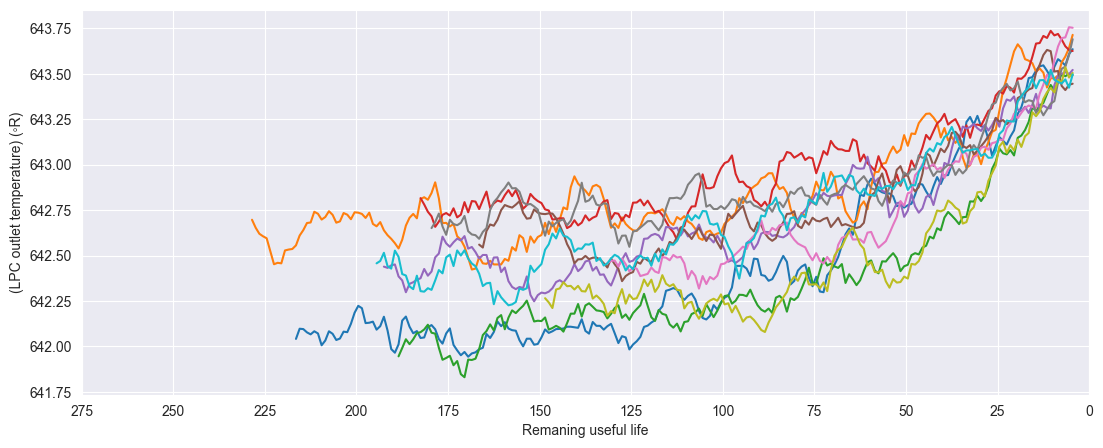

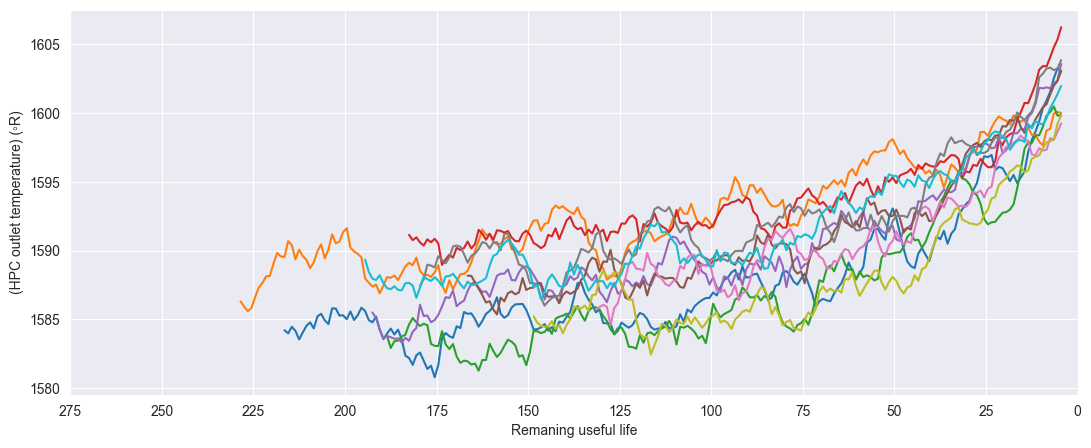

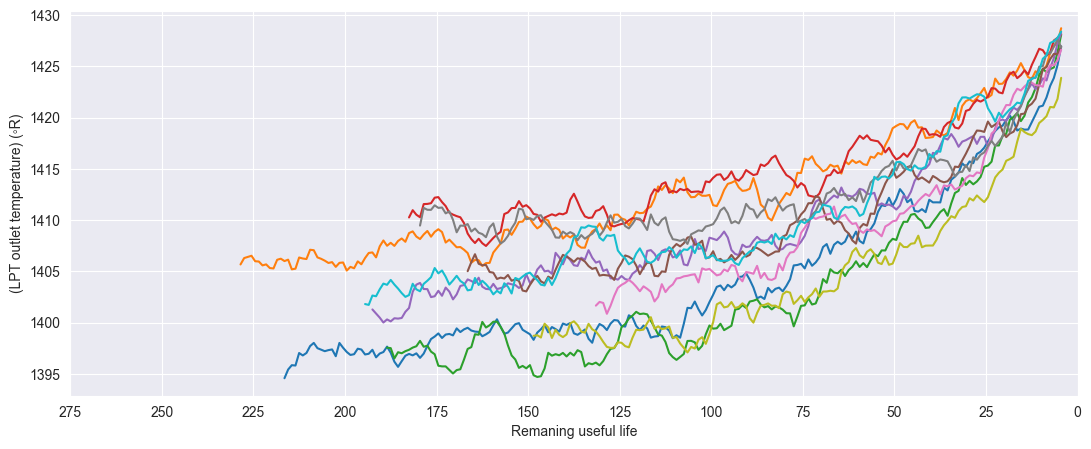

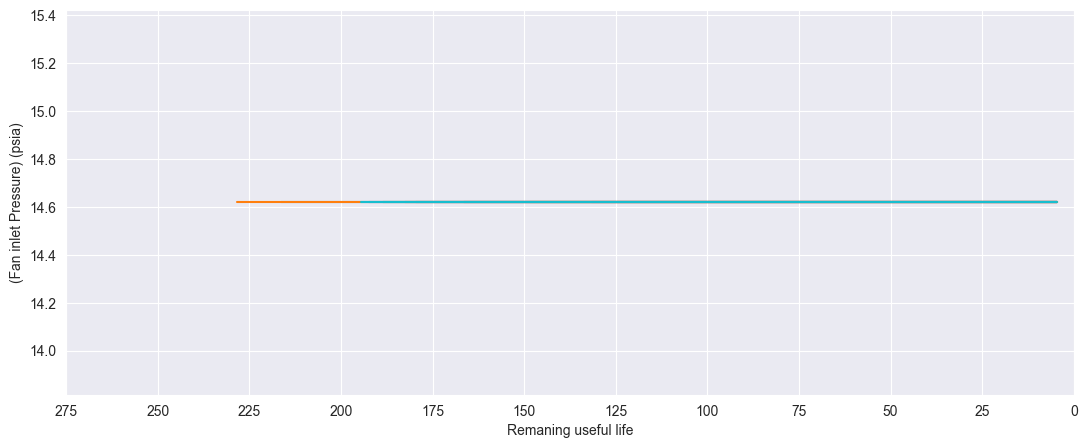

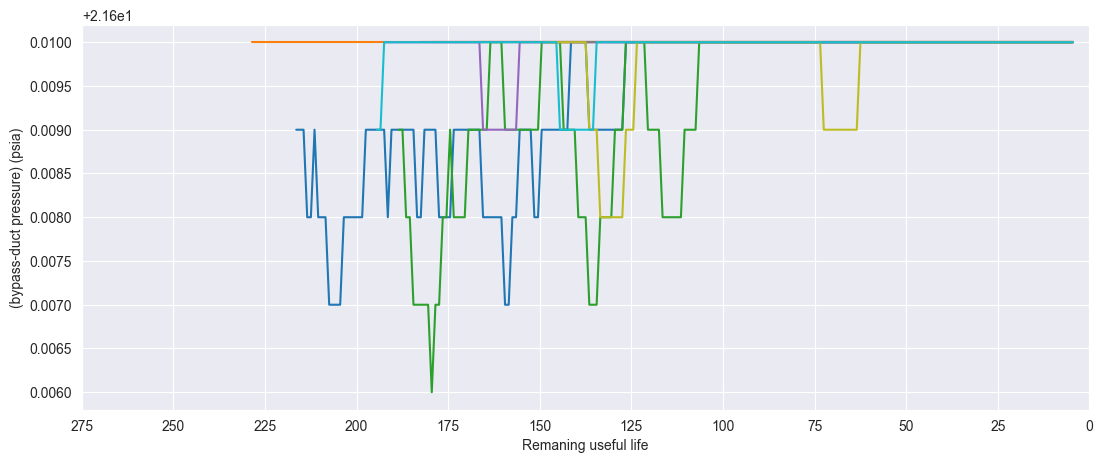

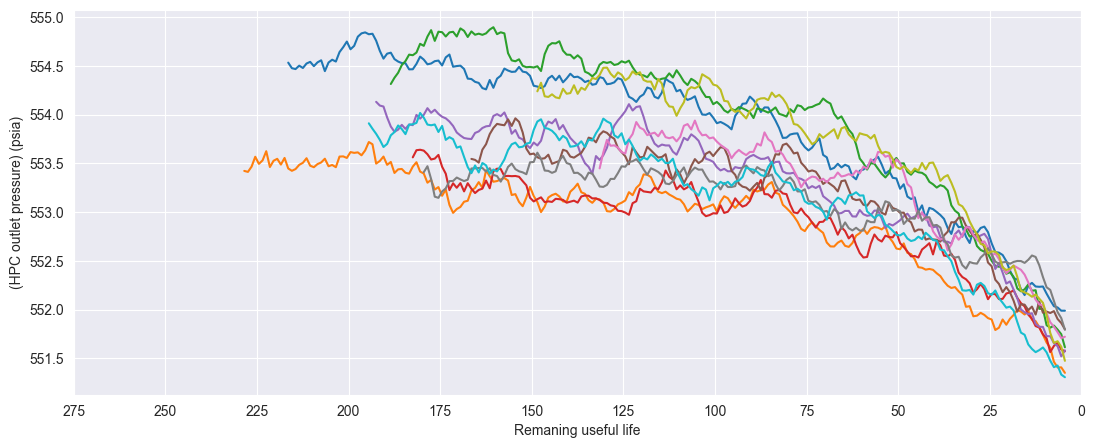

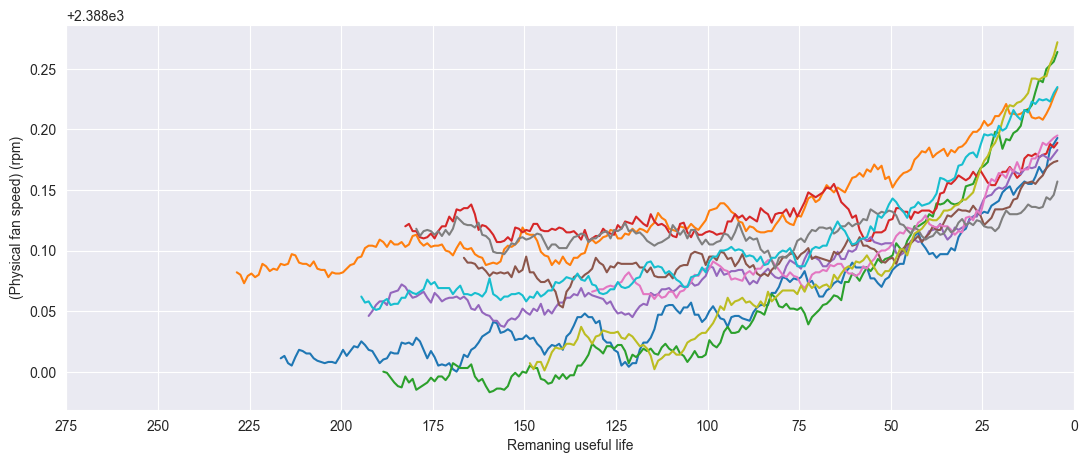

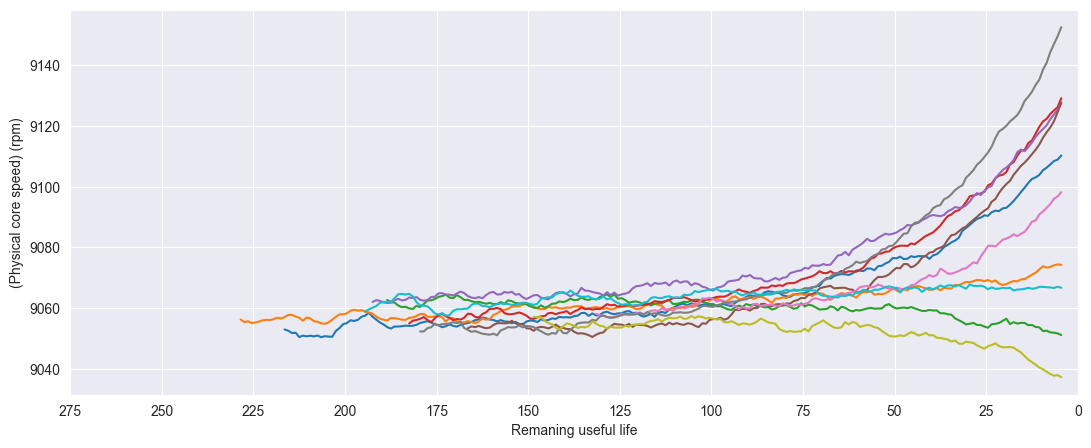

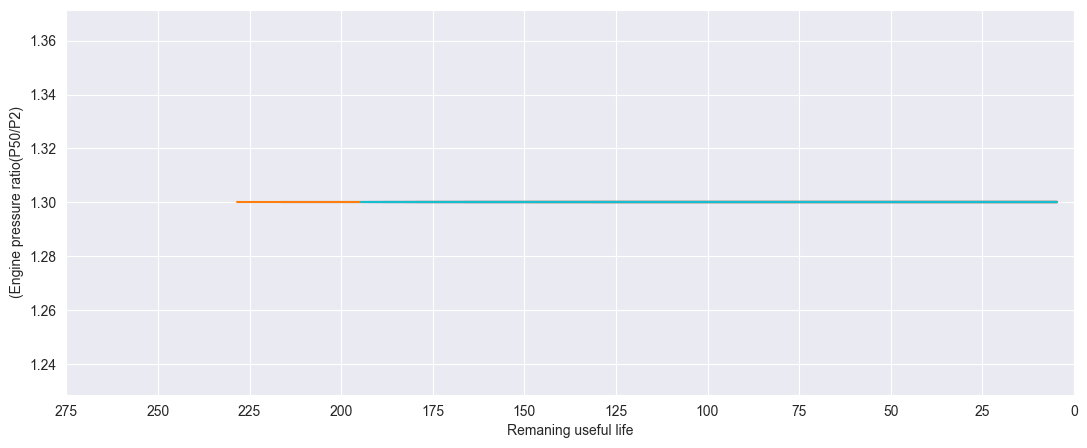

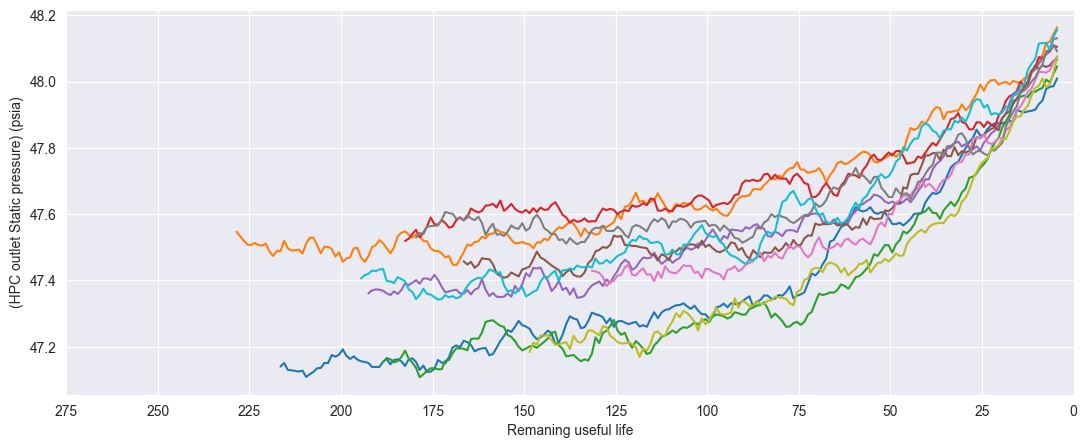

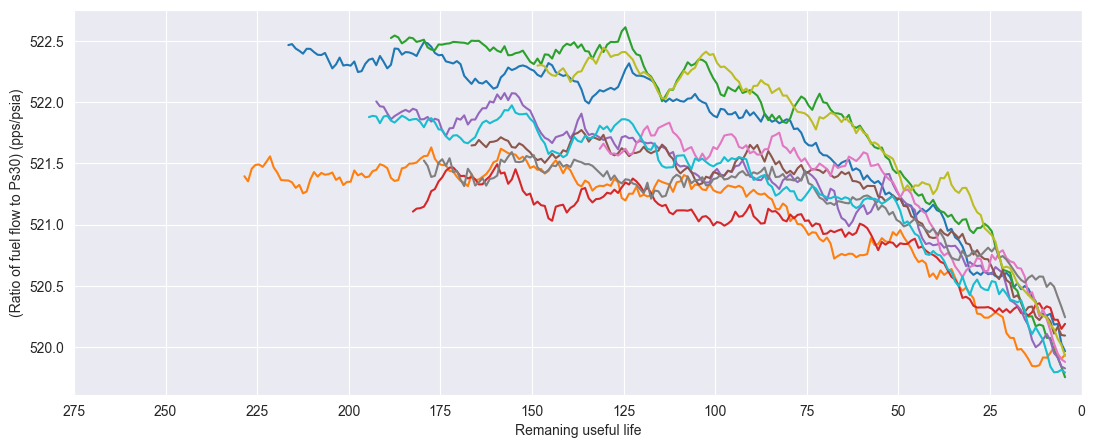

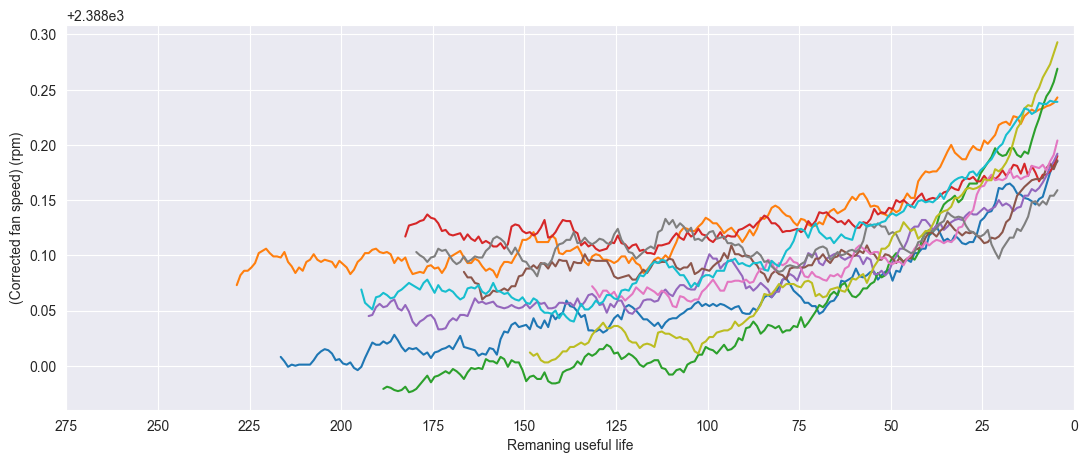

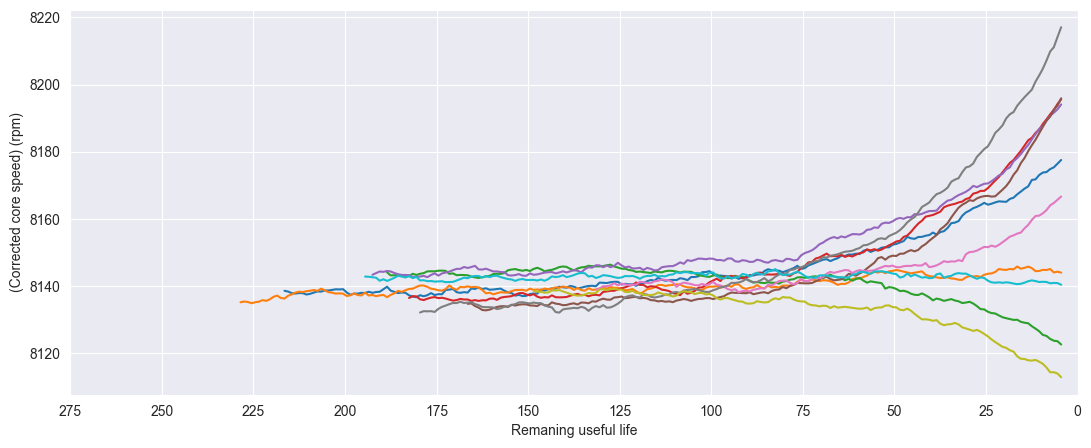

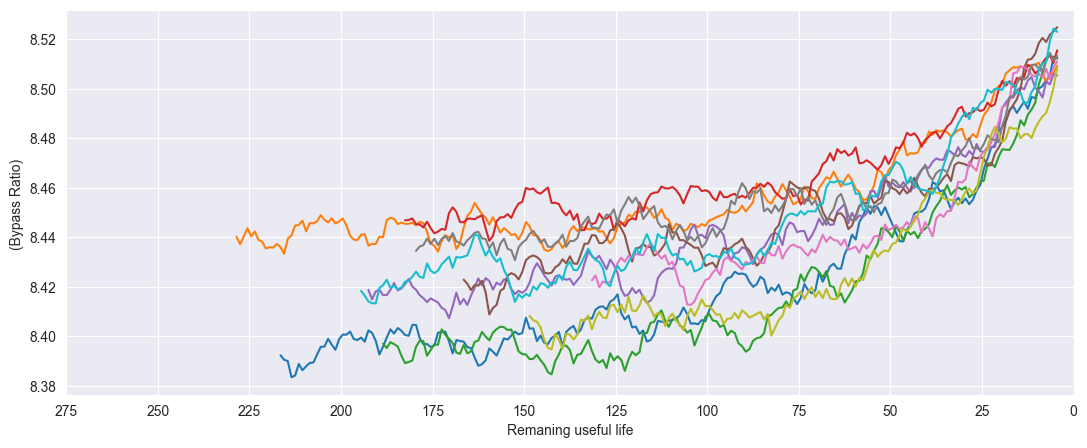

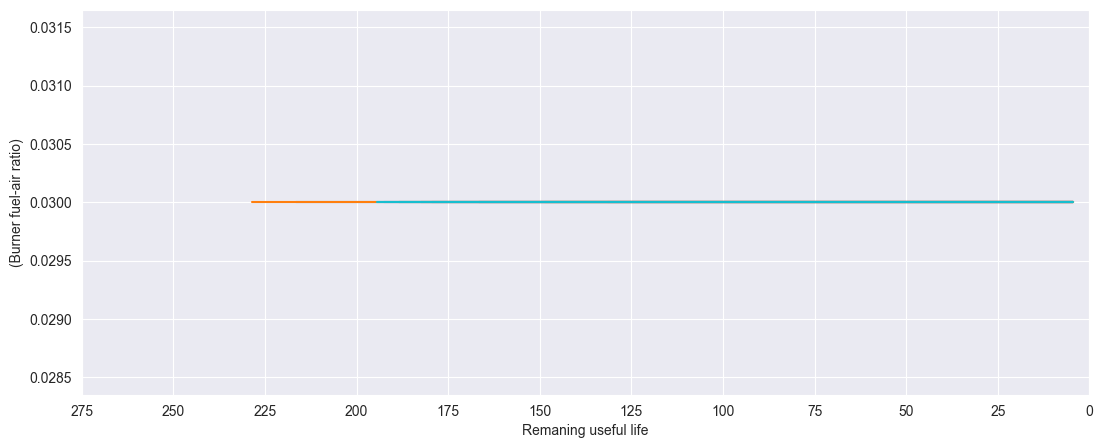

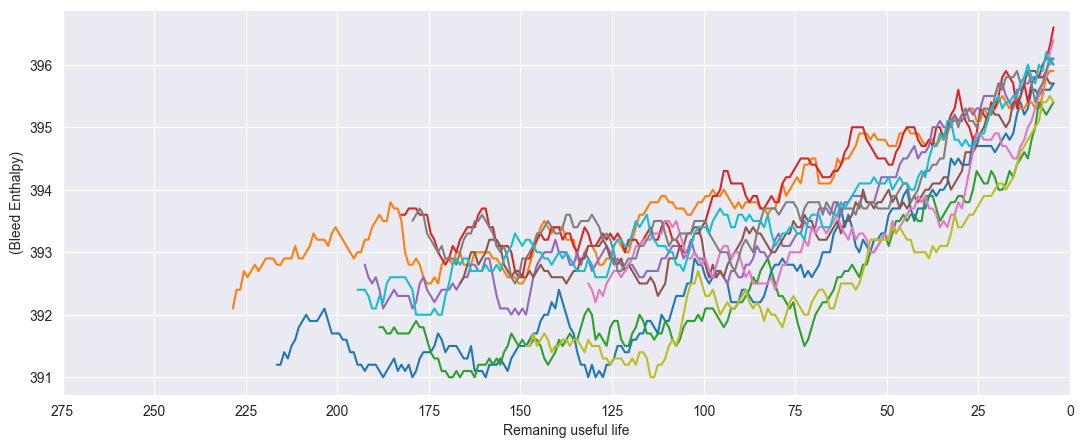

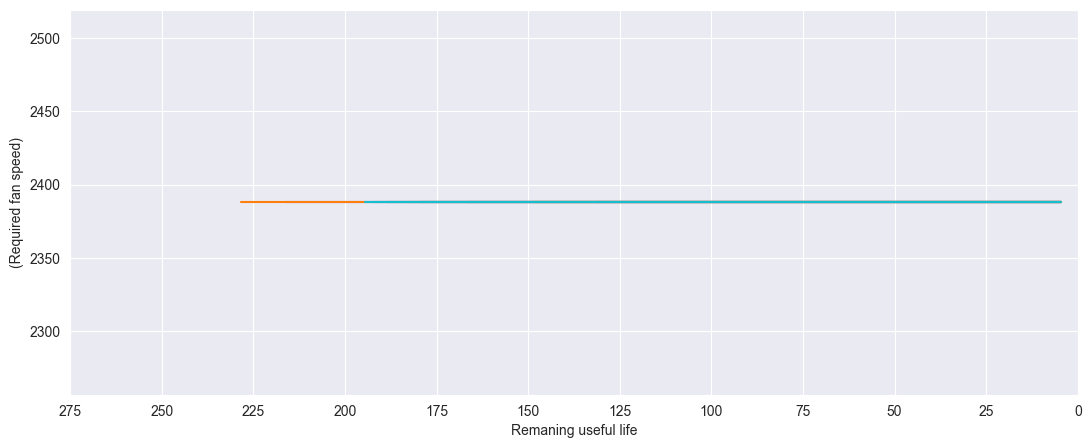

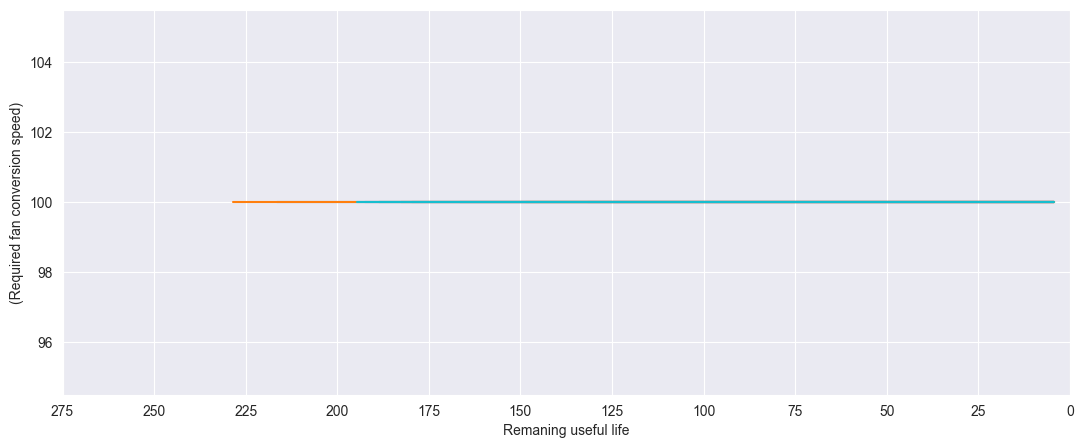

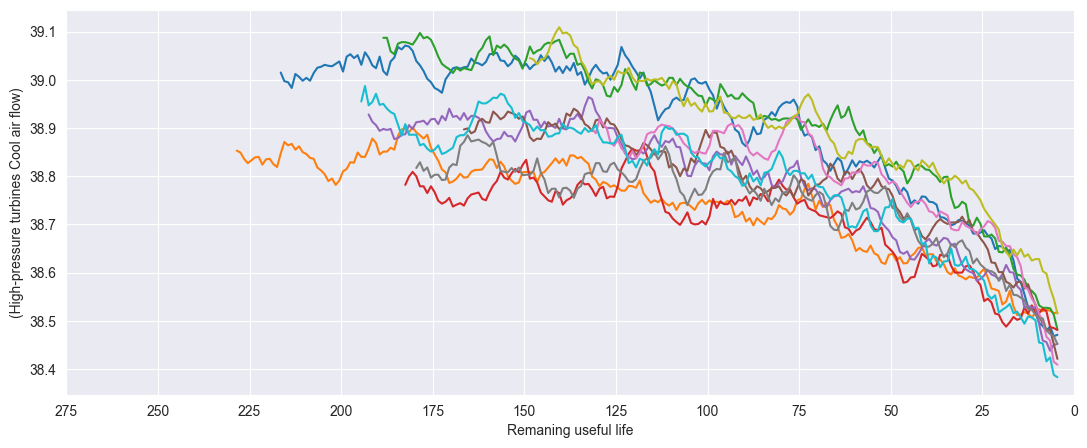

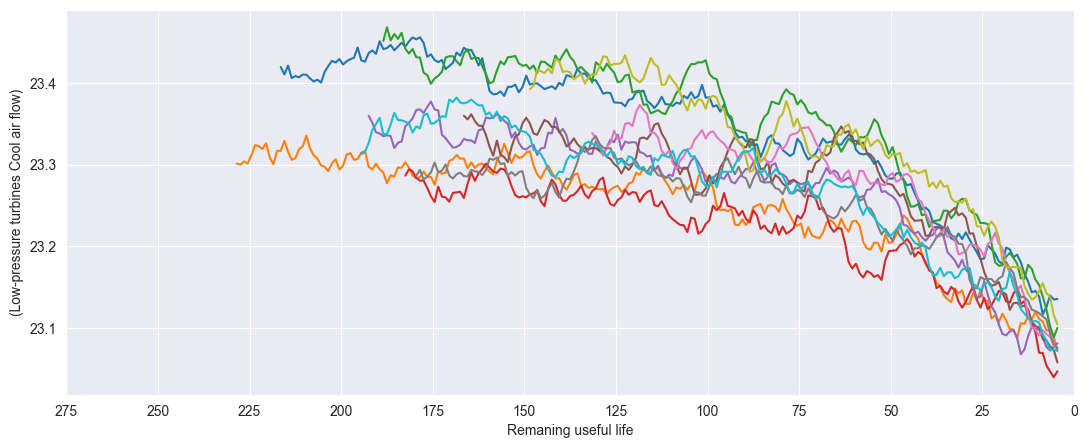

In [112]:
for i in range(1,22):
    plot_signal(train, sensor_dictionary, 's_' + str(i))

In [143]:
# Note some sensor data have no correlation with remaining useful life, hence safe to remove them from features
drop_columns = ['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19']

In [144]:
# Generate train/test split
from sklearn.model_selection import train_test_split
features = train.drop(columns=drop_columns+['RUL'])
labels = train['RUL']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [145]:
# Before building ML models, we need to scale the data because some measurements are in thousands, while some are in 0. decimal places
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [146]:
# Construct validation data
X_valid = valid.groupby(by='unit').last().reset_index().drop(columns=drop_columns)
X_valid = scaler.fit_transform(X_valid)

In [147]:
print(X_valid.shape)
print(y_valid.shape)

(100, 14)
(100, 1)


array([[<AxesSubplot: title={'center': 's_2'}>,
        <AxesSubplot: title={'center': 's_3'}>,
        <AxesSubplot: title={'center': 's_4'}>,
        <AxesSubplot: title={'center': 's_7'}>],
       [<AxesSubplot: title={'center': 's_8'}>,
        <AxesSubplot: title={'center': 's_9'}>,
        <AxesSubplot: title={'center': 's_11'}>,
        <AxesSubplot: title={'center': 's_12'}>],
       [<AxesSubplot: title={'center': 's_13'}>,
        <AxesSubplot: title={'center': 's_14'}>,
        <AxesSubplot: title={'center': 's_15'}>,
        <AxesSubplot: title={'center': 's_17'}>],
       [<AxesSubplot: title={'center': 's_20'}>,
        <AxesSubplot: title={'center': 's_21'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

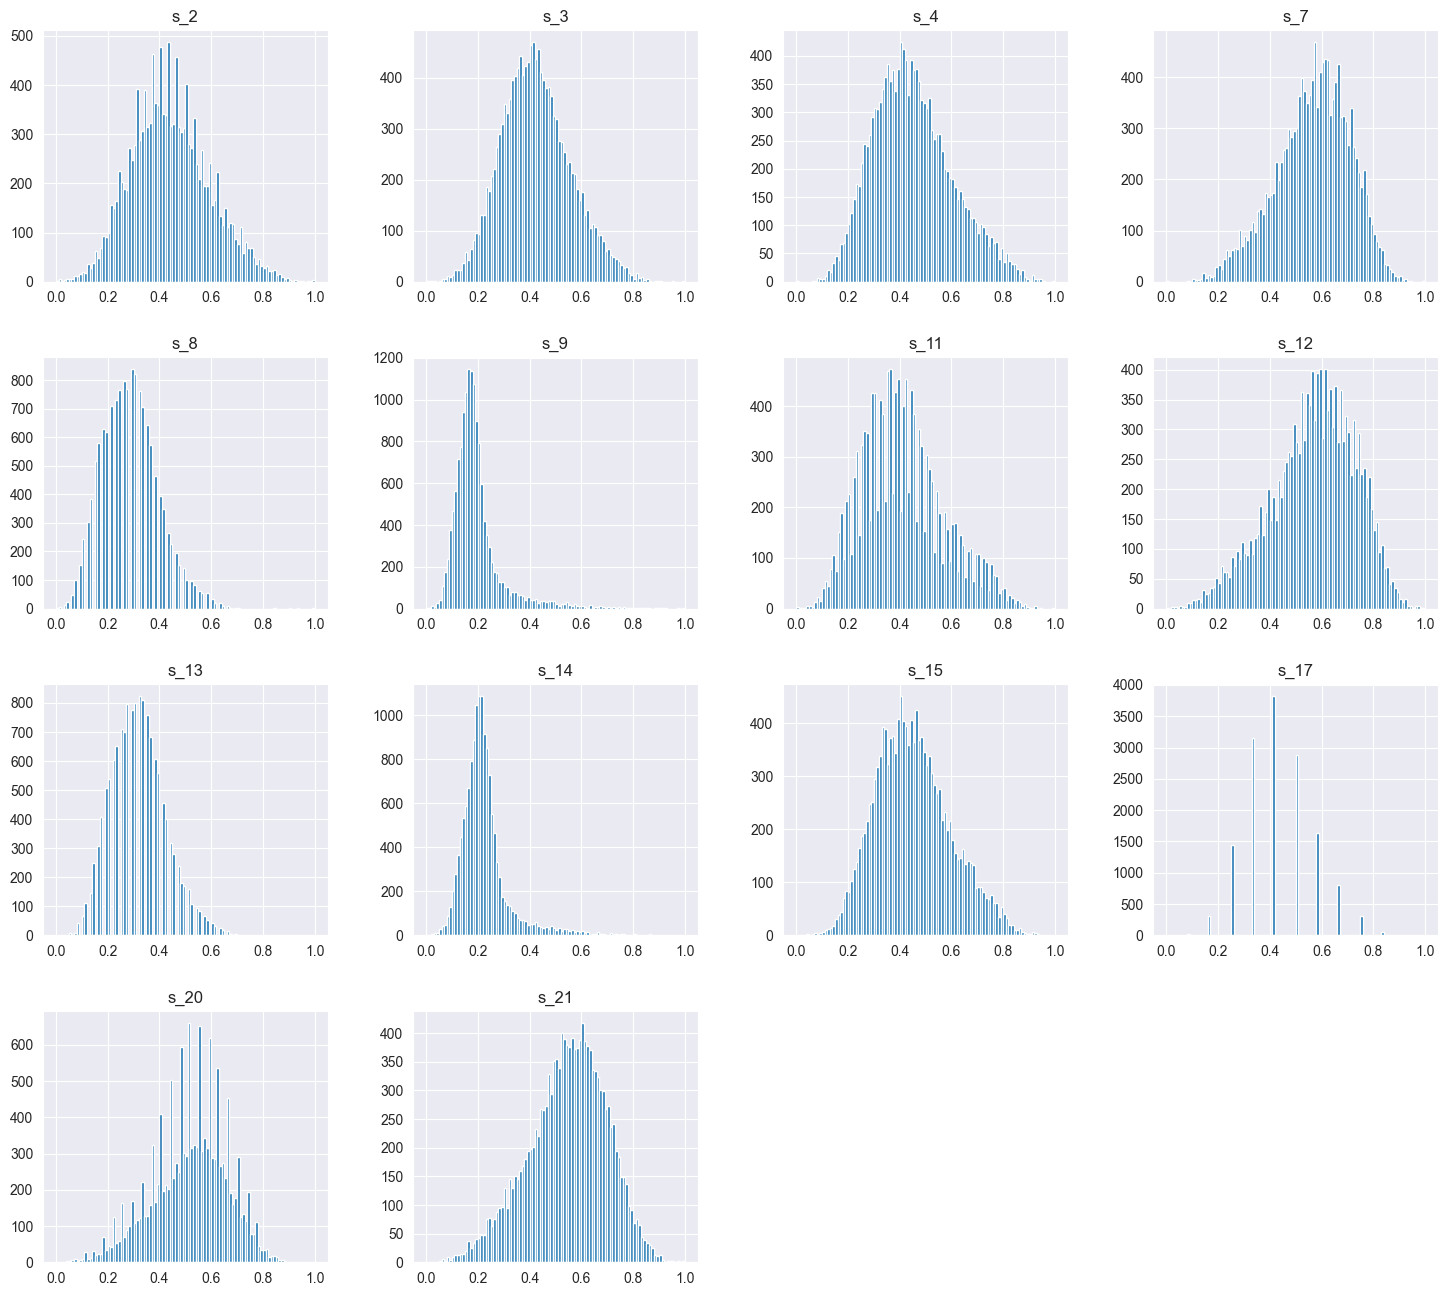

In [154]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train, columns=sensor_names).hist(bins=100, figsize=(18,16))